<h1 style="color : green"> Bengaluru House Prediction</h1>

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,20)

In [4]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [5]:
#shows number of rows and columns
df1.shape

(13320, 9)

In [6]:
# The groupby function in Pandas is a tool that helps you organize data into groups 
# based on certain criteria, like the values in a column.

#the below line means, groupby area_type and count area_type
result = df1.groupby('area_type')['area_type'].agg('count')
display(result)

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
# Removing some columns, that are not necessary okey

# Drop specified labels from rows or columns (axis 0 means rows, and axis = 1 means columns)
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis=1)
df2.head()


location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [8]:
# Data Cleaning
# checking the number of NA/Null examples

# The output of df.isnull().sum() is a Pandas Series
# where the index represents the column names of the
# original DataFrame and the values represent the count of
# null values in each respective column
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# Dropping off the null/NA examples

df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [11]:
# Since hamare pass 2bhk bhi hai and also 2 bedroom, both means same

df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

The apply() method in Pandas is a versatile function used to apply a custom or built-in function along an axis of a DataFrame or to each element of a Series. Its primary purpose is to enable flexible data transformations and manipulations that might not be directly available through vectorized Pandas operations.

 Lambda Function: Its primary work involves applying custom logic or transformations to data without the need for formally defining a separate function.

In [12]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(" ")[0]))

C:\Users\Baba_\AppData\Local\Temp\ipykernel_10628\3176993600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(" ")[0]))


In [13]:
df3.head()

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [14]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

How do we have a 43 bedroom(bhk)

In [15]:
df3[df3.bhk>20]

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

how come 43 bedroom is fitted in 2400sq_ft??? It's like a error

In [16]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

1133 - 1384  we got range in total Sqft

i need in single digit number

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

# What happens is that in try block "x" a number tries to convert a value in float
# if it can be converted in float its good and returns true, but if its something like
# a range of value like in total_sqft 1133-1145 and all, it goes to except block and returns false

In [18]:
# we apply "~" at the start to look for values that have been 
# returned false in the "is_float" func

df3[~df3['total_sqft'].apply(is_float)].head(15)

location       size      total_sqft  bath    price  bhk
30               Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122                 Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137     8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165               Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188               KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410                Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549            Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648                Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661              Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672           Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4
772  Banashankari Stage VI      2 BHK     1160 - 1195   2.0   59.935    2
775           Basavanagara      1 BHK   1000Sq. Meter   2.0   93.000    1
850      Bannerghatta Road      2 BHK     1115 - 1130   2.0   58.935    2
872      Singapura Village      2 BHK   1100Sq. Yards   2.0   45.000    2
886             Chandapura      1 BHK       520 - 645   1.0   15.135    1

we get values in total_sqft like perch, Sq. Meter, and ranges, and all like unstructured and stuffs, not clean

In [19]:
#  Cleaning values like these
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        range_sum = float(token[0])+float(token[1])
        avg = range_sum/2
        return avg
    

    try:
        return float(x)
    except:
        return None

In [20]:
# Sample Run
convert_sqft_to_num('3156Sq.mt')

In [21]:
# .copy() does a deep copy of original dataframe
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(lambda x:convert_sqft_to_num(x))
df4.head(15)

location       size  total_sqft  bath   price  bhk
0   Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1           Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2                Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3         Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                   Kothanur      2 BHK      1200.0   2.0   51.00    2
5                 Whitefield      2 BHK      1170.0   2.0   38.00    2
6           Old Airport Road      4 BHK      2732.0   4.0  204.00    4
7               Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4
8               Marathahalli      3 BHK      1310.0   3.0   63.25    3
9               Gandhi Bazar  6 Bedroom      1020.0   6.0  370.00    6
10                Whitefield      3 BHK      1800.0   2.0   70.00    3
11                Whitefield  4 Bedroom      2785.0   5.0  295.00    4
12        7th Phase JP Nagar      2 BHK      1000.0   2.0   38.00    2
13                 Gottigere      2 BHK      1100.0   2.0   40.00    2
14                  Sarjapur  3 Bedroom      2250.0   3.0  148.00    3

checking if value at index 30 which was before an range of sqft number 

In [22]:
df4.loc[30]

# Yes, its now a single valued

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

<p style="color: yellow;">Data Cleaning is Done.</p>

<p style = "color: yellow;"> Adding Feature Engineering. </p>

In the world of data science and machine learning, feature engineering is the crucial process of transforming raw data into a format that best represents the underlying problem to the predictive models. It's about creating meaningful input variables, known as features, that help machine learning algorithms learn and make accurate predictions

In [23]:
df5 = df4.copy()

# Adding a feature for price per sqft(since we have price in lakhs in our dataset)
df5['price_per_sqft'] = (df5['price']*100000)/df5['total_sqft']
df5.head(5)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [24]:
len(df5['location'].unique())

1304

We have a total of 1304 locations, which are too much

In [25]:
df5['location'] = df5['location'].apply(lambda x: x.strip())
# df5.head()

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

making a threshold where if there is less than 10 houses, we mark them as other_loc

In [26]:
# df6 = df5.drop('other_location',axis=1)
df5.head()


location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [27]:
len(location_stats[location_stats<=10])


1052

In [28]:
location_less_than_10 = (location_stats[location_stats<=10])
location_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [29]:
len(df5.location.unique())

1293

In [30]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df5.location.unique())

242

In [31]:
df5.head(10)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

Done with Feature Engineering

<p style="color:yellow;">Outliner Removal:</p> 

Data that are valid but still are in extreme value, which are sometimes considered as good to remove, which might create issue later up ahead.

In [33]:
# what should be the typical sqft per bedrrom --- around 300
# so we create a threshold of 300/bedroom

df5[df5.total_sqft/df5.bhk<300].head(10)

location       size  total_sqft  bath  price  bhk  \
9                  other  6 Bedroom      1020.0   6.0  370.0    6   
45            HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58         Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68   Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                 other  3 Bedroom       500.0   3.0  100.0    3   
78      Kaval Byrasandra      2 BHK       460.0   1.0   22.0    2   
89          Rajaji Nagar  6 Bedroom       710.0   6.0  160.0    6   
119          Hennur Road  2 Bedroom       276.0   3.0   23.0    2   
129   Vishwapriya Layout  7 Bedroom       950.0   7.0  115.0    7   
149                other  6 Bedroom      1034.0   5.0  185.0    6   

     price_per_sqft  
9      36274.509804  
45     33333.333333  
58     10660.980810  
68      6296.296296  
70     20000.000000  
78      4782.608696  
89     22535.211268  
119     8333.333333  
129    12105.263158  
149    17891.682785

In [34]:
df5.shape

(13246, 7)

In [37]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]

In [38]:
df6.shape

(12502, 7)

The describe() method in Pandas generates descriptive statistics of DataFrame columns which provides key metrics like mean, standard deviation, percentiles and more.

In [39]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

The mean is the average of a data set, representing its central value, while the standard deviation measures the dispersion or spread of data points around that mean. 

In [42]:
def remove_pps_outliners(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        stdev = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-stdev)) & (subdf.price_per_sqft <=(m + stdev))]
        df_out  = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df7 = remove_pps_outliners(df6)
df7.shape

(10241, 7)

so we approximately remove 2000 outliners for price per sqft outliners

 sometimes, in the same location for the 1bhk costs 30lakhs but the 2 bhk costs 20lakhs, 2bhk costs 1cr and 3 bhk costs 80lakhs in the same location.
 So we remove this also...


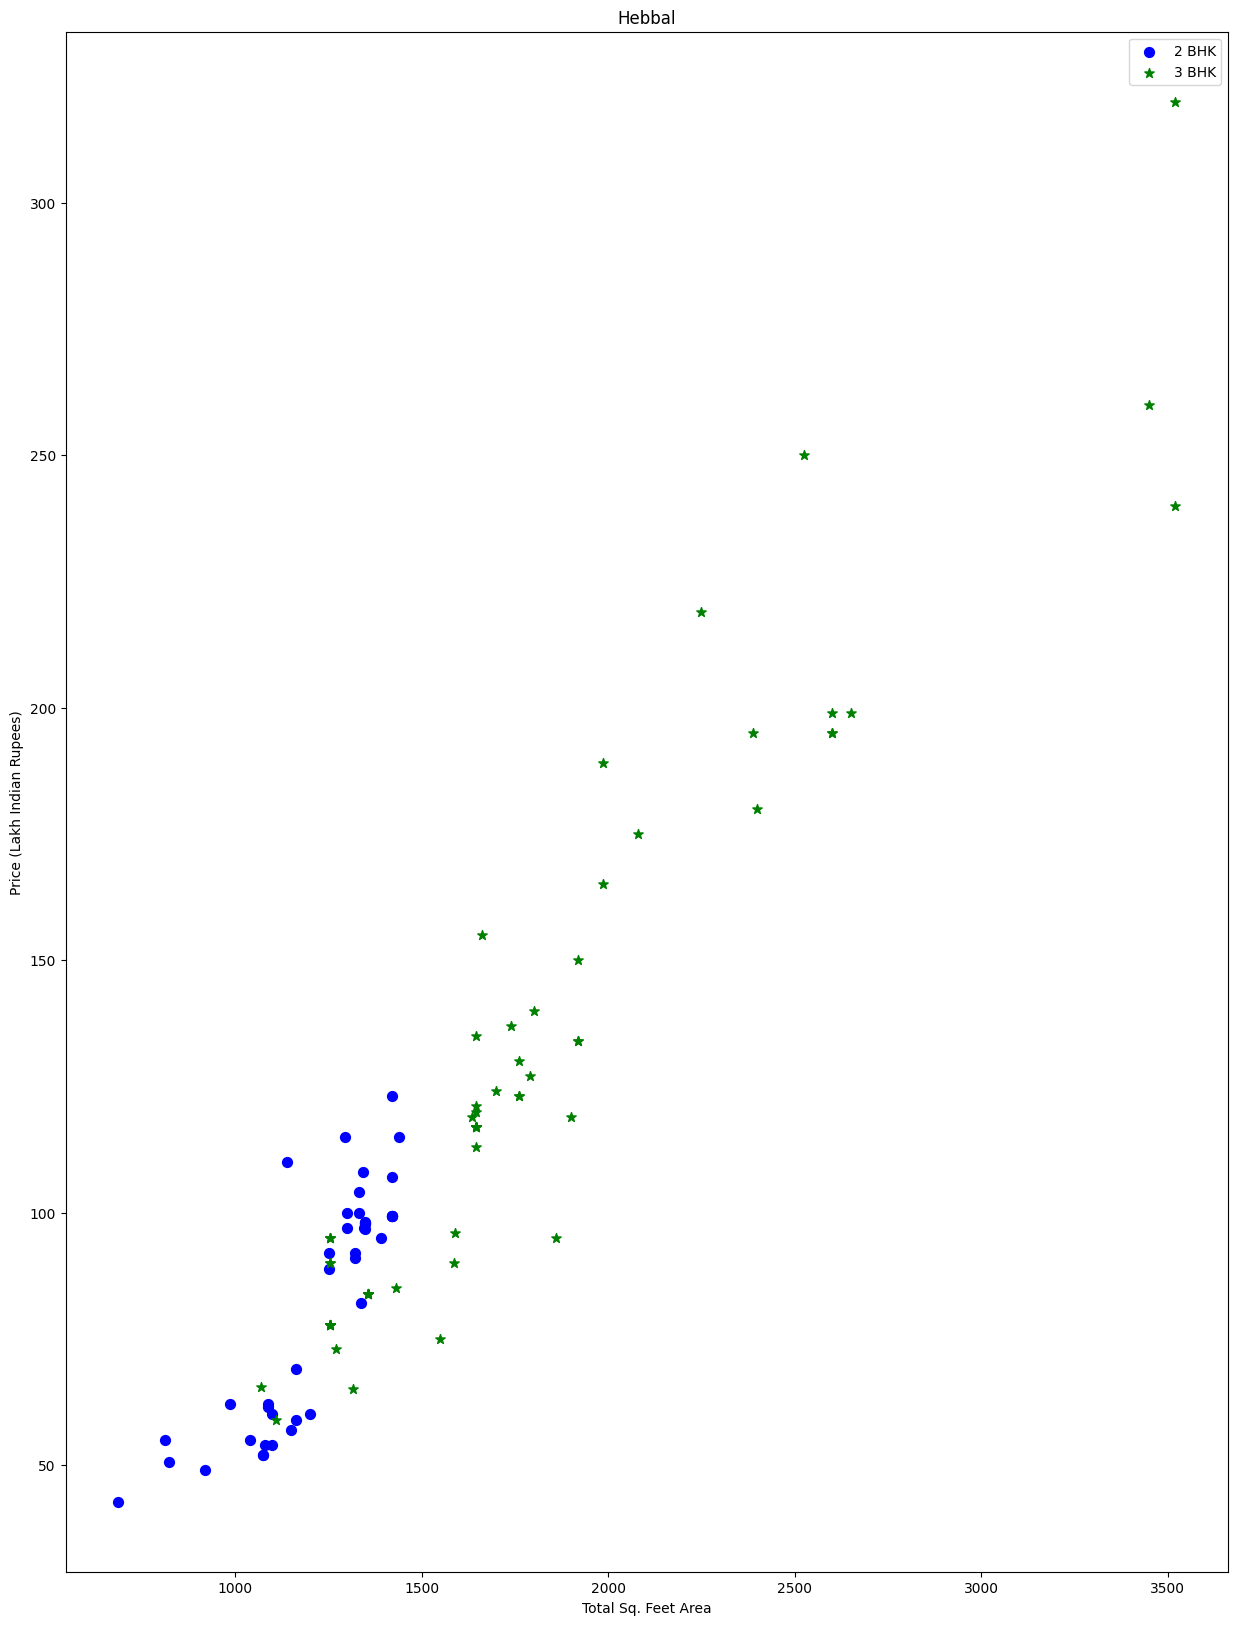

In [53]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,20)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '*', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("Total Sq. Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, 'Hebbal')

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{

    '1' : {

        'mean': 4000,

        'std: 2000,

        'count': 34

    },

    '2' : {

        'mean': 4300,

        'std: 2300,

        'count': 22

    },    

}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [56]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

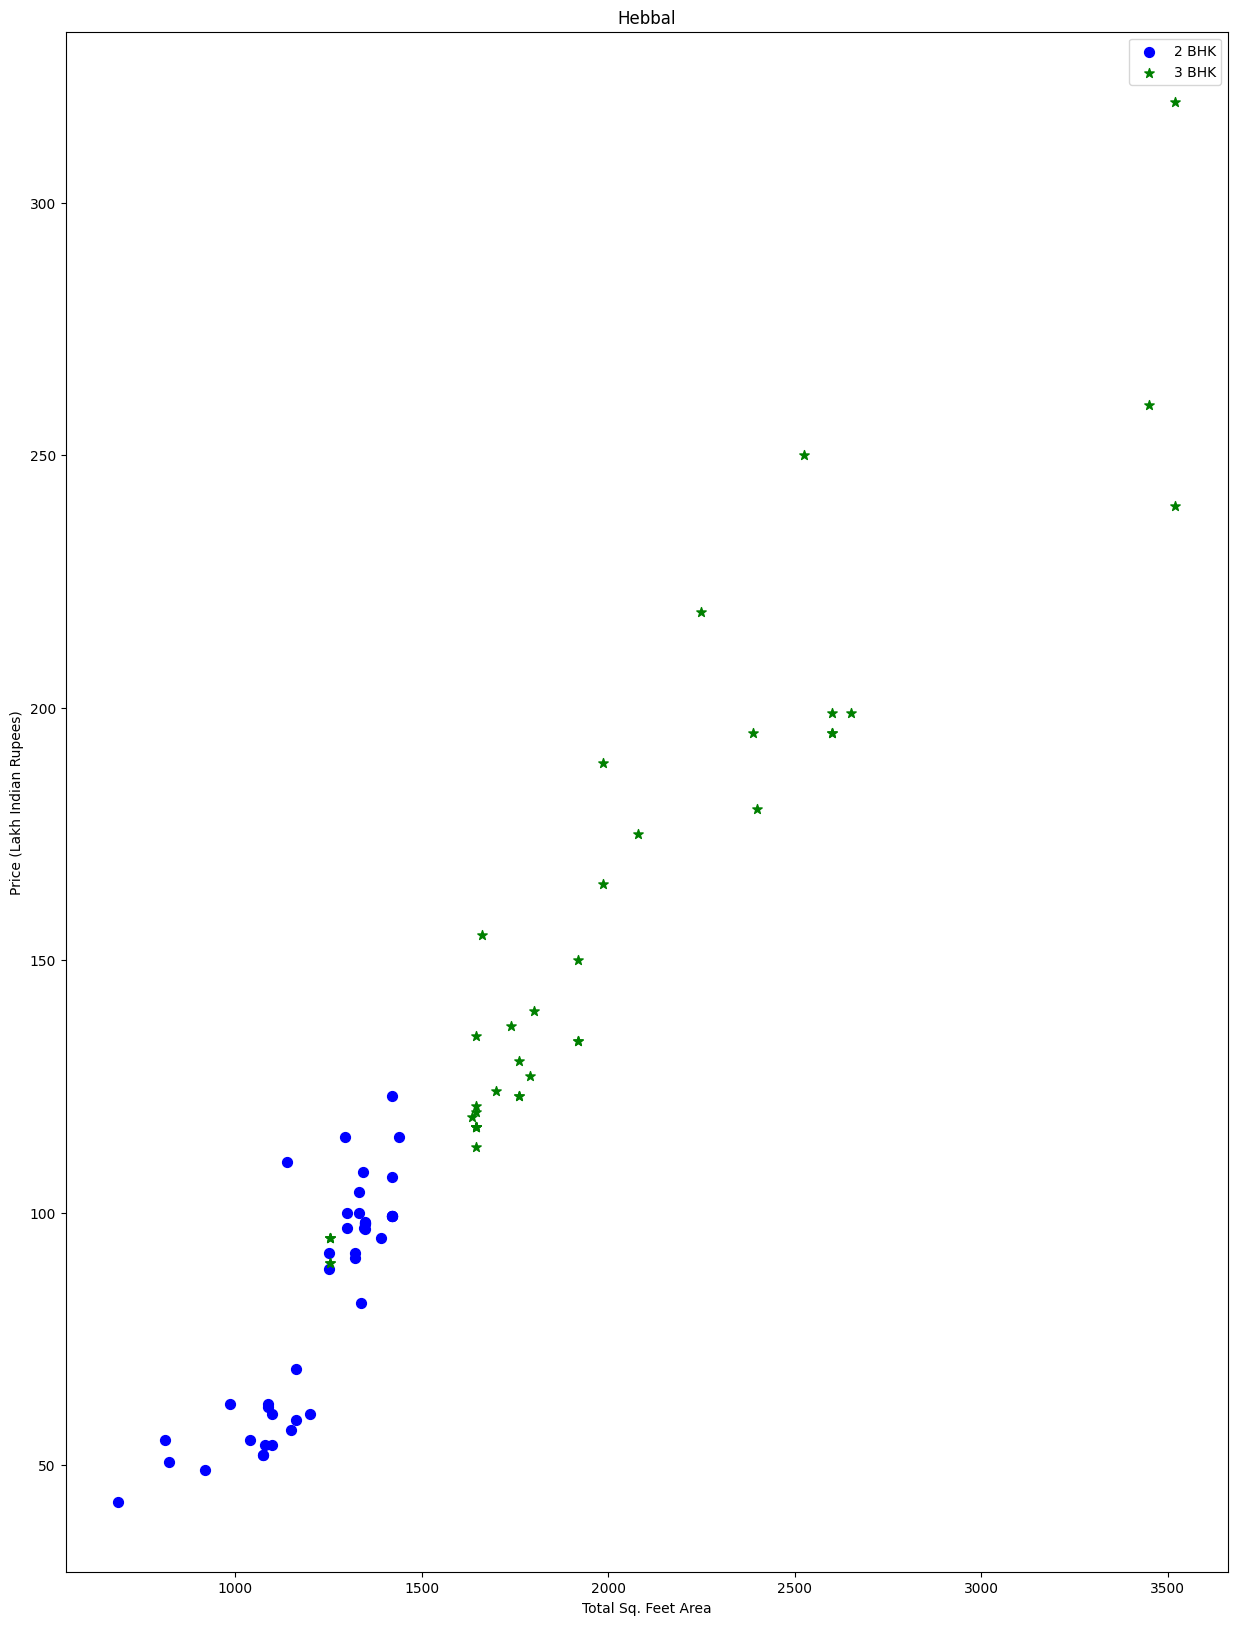

In [57]:
plot_scatter_chart(df8, 'Hebbal')

Text(0, 0.5, 'Count')

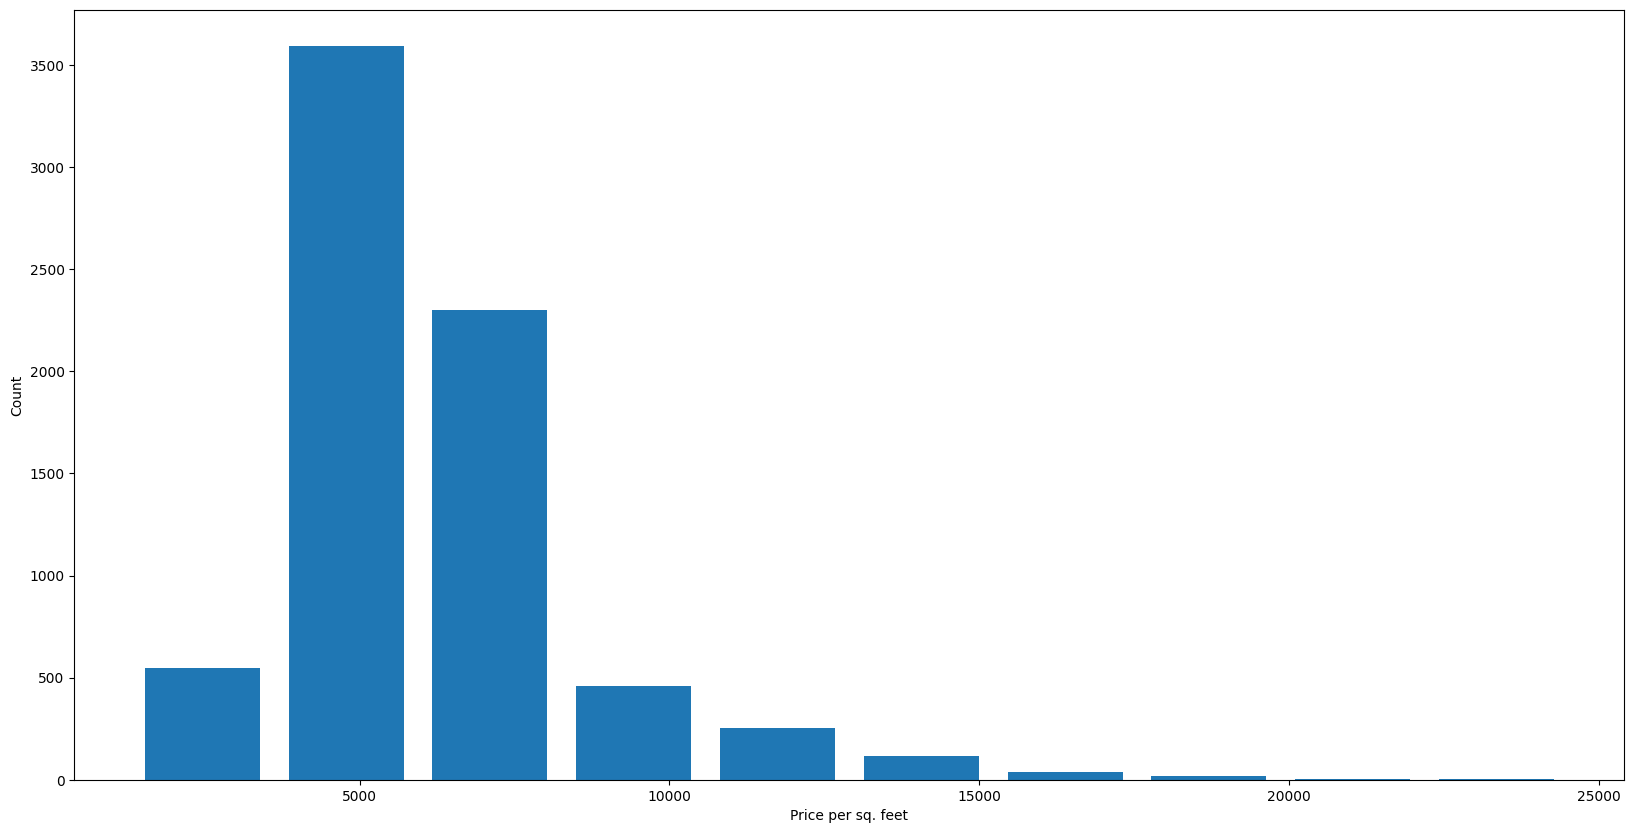

In [58]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per sq. feet")
plt.ylabel("Count")

In [59]:
#  Lets dive to look abnormalities in number of Bathrooms

df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [60]:
# theres 10, 13 bathrooms 

df8[df8.bath>=10]

location    size  total_sqft  bath  price  bhk  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8486           other  10 BHK     12000.0  12.0  525.0   10     4375.000000
8575           other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9308           other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9639           other  13 BHK      5425.0  13.0  275.0   13     5069.124424

Text(0, 0.5, 'Count')

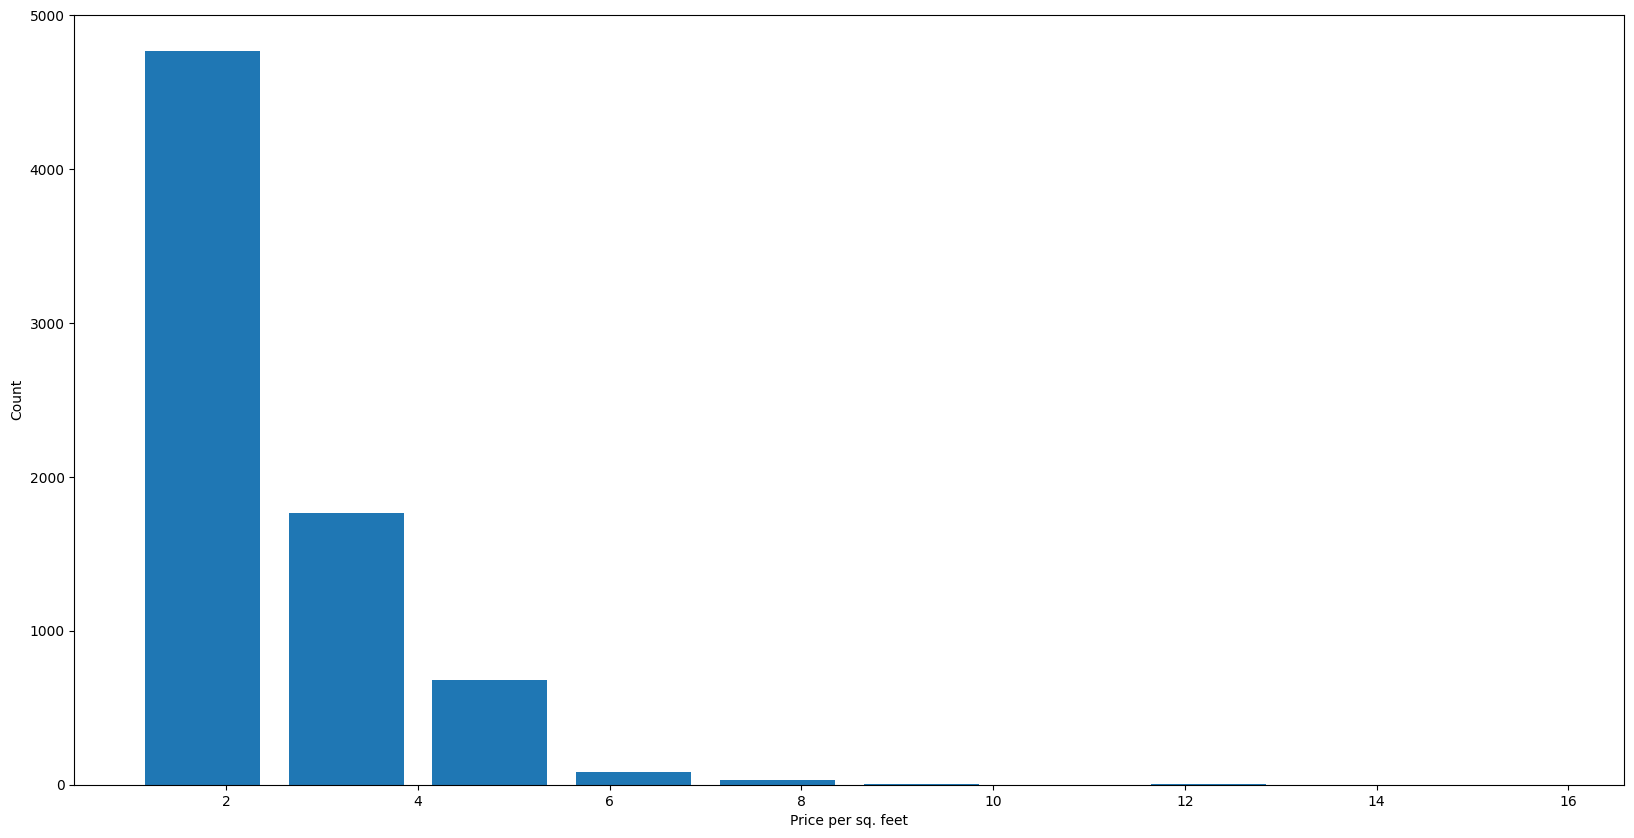

In [61]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Price per sq. feet")
plt.ylabel("Count")

In [65]:
df8[df8.bath>df8.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqft
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8411          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

In [67]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

 Now the Outliners are removed, the next thing is that we remove the unnecessary columns like size(since we already have bhk), and price_per_sqft(we only made it for outliner removal) -->

In [68]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3